In [1]:
! pip install -q supervision
! pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 586.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 21.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, HTML
from google.colab import output
import base64
import matplotlib.pyplot as plt
import os
import glob
import ipywidgets as widgets
import time


In [3]:
model = YOLO('/content/drive/MyDrive/Colab/content/Yolo_Rock_Papper_Scissor/best.pt', task='detect')

In [4]:
image = cv2.imread('/content/drive/MyDrive/Colab/content/Yolo_Rock_Papper_Scissor/0095_png.rf.4ca874168c497d1e8f2b790d74733453.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(-0.5, 639.5, 639.5, -0.5)

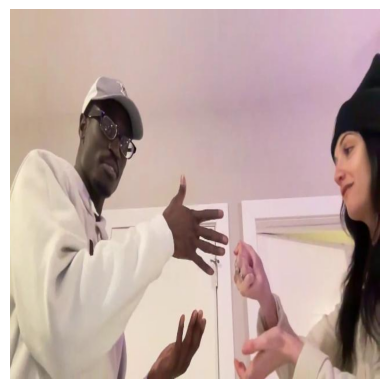

In [5]:
plt.imshow(image)
plt.axis('off')

In [6]:
result = model(source='/content/drive/MyDrive/Colab/content/Yolo_Rock_Papper_Scissor/0095_png.rf.4ca874168c497d1e8f2b790d74733453.jpg')


image 1/1 /content/drive/MyDrive/Colab/content/Yolo_Rock_Papper_Scissor/0095_png.rf.4ca874168c497d1e8f2b790d74733453.jpg: 640x640 1 Paper, 1 Rock, 17.2ms
Speed: 3.1ms preprocess, 17.2ms inference, 97.7ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
img_array = result[0].plot()

In [8]:
img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)

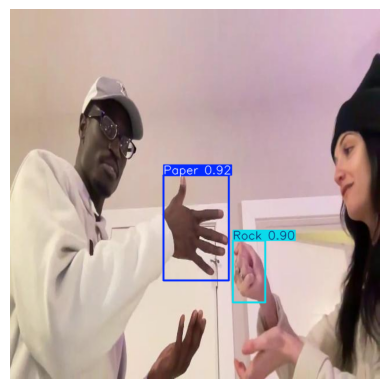

In [9]:
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [10]:
video_path = '/content/drive/MyDrive/Colab/content/Yolo_Rock_Papper_Scissor/ZWEIAS~1.MP4'

In [11]:
def process_frame(frame):
    # Perform detection
    results = model(frame, verbose=False)
    # Visualize the results on the frame
    annotated_frame = results[0].plot()
    return annotated_frame

def display_video(video_path):
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Define the codec and create VideoWriter object
    output_video_path = 'output_video.mp4'
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Create a widget to display the video
    img_widget = widgets.Image(format='jpeg', width=640, height=480)
    display(img_widget)

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            # Process the frame
            annotated_frame = process_frame(frame)

            # Write the frame to the output video
            out.write(annotated_frame)

            # Save frame as image (optional)
            if frame_count % 30 == 0:  # Save every 30th frame
                cv2.imwrite(f'frames/frame_{frame_count:04d}.jpg', annotated_frame)

            # Convert frame to RGB (OpenCV uses BGR)
            rgb_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

            # Convert to JPEG
            pil_img = Image.fromarray(rgb_frame)
            buff = io.BytesIO()
            pil_img.save(buff, format="JPEG")

            # Update the image widget
            img_widget.value = buff.getvalue()

            # Display progress
            frame_count += 1
            if frame_count % 30 == 0:  # Update progress every 30 frames
                progress = frame_count / total_frames * 100
                print(f"Processing: {progress:.2f}% complete", end='\r')

            # Add a small delay to control playback speed
            time.sleep(1/fps)

        else:
            break

    # Release everything when done
    cap.release()
    out.release()

    print("\nVideo processing completed. Video saved as 'output_video.mp4'")

# Call the function with your video path
display_video(video_path)



Image(value=b'', format='jpeg', height='480', width='640')


Video processing completed. Video saved as 'output_video.mp4'
